In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


c:\Users\lucas\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\lucas\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\lucas\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy Score: 0.5795304668952783
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.86      0.71      0.78     16695
       Minor       0.53      0.48      0.50      8507
    Moderate       0.29      0.28      0.28      3967
      Severe       0.11      0.35      0.17       896
       Fatal       0.07      0.59      0.13       263

    accuracy                           0.58     30328
   macro avg       0.37      0.48      0.37     30328
weighted avg       0.67      0.58      0.61     30328



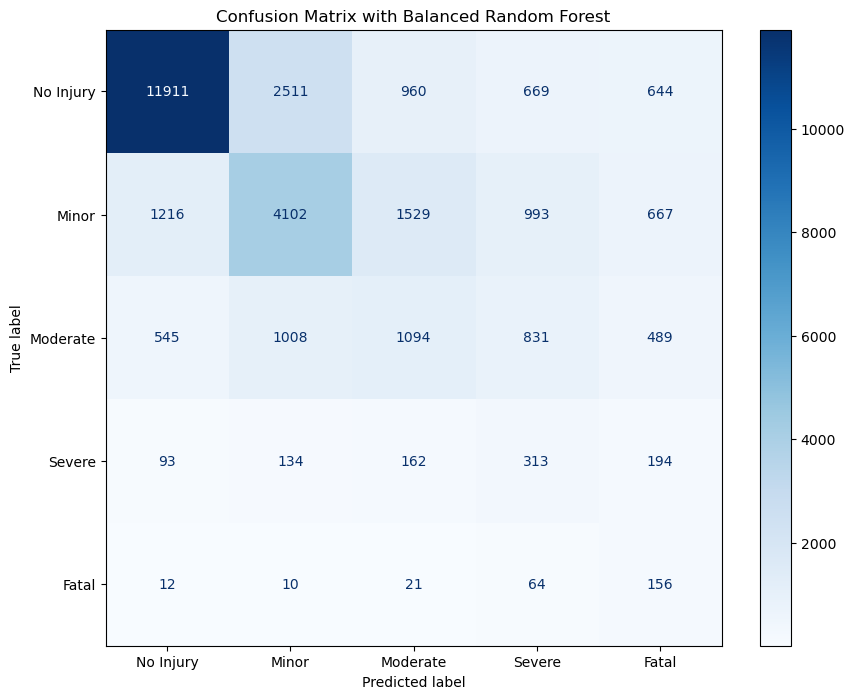

In [3]:
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
# Create a pipeline with scaling and the balanced random forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', BalancedRandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Injury', 'Minor', 'Moderate', 'Severe', 'Fatal'])
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix with Balanced Random Forest')
plt.show()
